# ELEC5508 LAB 7 AI-enhanced Wireless Communications

# Objectives

The main objectives of this lab are to investigate, apply and implement **AI solutions to enhance Wireless Communications**. These activities within this lab will extend from the previous practical exercises on OFDM and MIMO by incorporating Machine Learning/Neural Networks into the signal processing chains of Wireless Communication Systems. Specifically for students
*   to learn and develop **an AI application** based on the open source ecosystem: TensorFlow and Keras. 
*   to model and simulate  **Wireless Communications** based on the open-source framework: NVIDIA Sionna.
*   to apply and implement **Machine Learning/Neural Networks** within Wireless Communication systems.









# Introduction

Wireless Communications and AI are two different disciplines, from telecommunications and computer science, respectively. Combining both disciplines enables us to develop a revolutionary technology that is useful to solve real-world problems nowadays. In this lab series, we will learn and practice to use AI in wireless engineering technologies (e.g. OFDM, MIMO and SDR).

AI has been extensively researched to support the development of the next generation of wireless devices. In this lab, we will learn how to apply the AI technique (based on a widely used open-source framework) to improve wireless communication systems. Note that AI is not a silver bullet that can solve all the problems in wireless engineering. It also has limitations, and how successful it would become depends on how the engineers (i.e. us) develop and deploy it.


This lab serves as an introduction to the new area of AI-enhanced signal processing in Wireless Communications.


*   The first part of the lab is to learn and use [TensorFlow](https://www.tensorflow.org/) (one of the most popular machine learning and AI library) and its high-level API Keras to build some AI applications throughout the entire development workflow. The open-source framework is widely used by many big tech brands such as Google, eBay, PayPal, Intel, Dropbox and Tencent. 
*   [NVIDIA Sionna](https://nvlabs.github.io/sionna/index.html) is an open-source library for 6G research. The second part is to explore this GPU-accelerated frame for developing some link-level modeling and simulation. It has native support for integrating TensorFlow/Keras models into the simulation. And it has become an attractive tool for performing AI-enhanced Wireless research.
*   The third part is to implement Neural Receiver for OFDM Systems based on Sionna incorporating TensorFlow. Neural network symbol detectors provide novel and alternative detections to the Euaqliser and Demodulation-based receivers that we cover in the earlier labs.  







# Prework

Python is a general-purpose high-level programming language, and it has been widely used by academics and commercial industries for Data Science and AI. It is ranked the top used programming language by [the IEEE Spectrum Magazine](https://spectrum.ieee.org/top-programming-languages-2022) in 2022, followed by C and C++. In this lab, reading and editing Python codes may be needed as Python is a high-level language that displays some similarities to MATLAB. 

If you are not familiar with Python, there have been many resources developed and can be accessed online for free. As senior students, we may choose our own study path. Some recommendations include Software Carpentry’s [Programming with Python](https://swcarpentry.github.io/python-novice-inflammation/) and B. Downey’s [Think Python](https://greenteapress.com/wp/think-python-2e/).

As for the introduction to Machine Learning and AI, some introductory materials include some  short videos from [Google AI Adventures](https://www.youtube.com/watch?v=HcqpanDadyQ&list=PLIivdWyY5sqJxnwJhe3etaK7utrBiPBQ2&index=1). Again, we may also choose our own resources.

Programming in this lab is coded in Python with Jupyter notebooks. Therefore we need to set up the software development platform. There are two options:
*   Running entirely on Cloud such as [Google Colab](https://colab.research.google.com/) (free and google account required). This is the **preferred option**  for this lab.
*   Installing Jupyter notebooks via [Anaconda](https://www.anaconda.com/) (free, and local installation/configuration required).




# Experiment 1 TensorFlow-Based AI application

In this experiment, we will use Google Colab as the Cloud platform to build one Machine Learning application using **TensorFlow/Teras**. Colab can be regarded as the Cloud version of the Jupyter Notebook. 

## 1) Import Libraries

The first step is to import the required packages/libraries into the program. In particular, we are using Neural Network based on Keras.

In [1]:
# Import tensorflow, numpy, and matplotlib
import tensorflow as tf
import numpy as np
from tensorflow import keras

import matplotlib
from matplotlib import pyplot as plt

## 2) Configuration of Neural Network

The second step is to configure a **neural network**. In neural network, the quality of the data may be as important as the neural network itself. In this example, we will take a simple input (i.e. x) to the output (i.e y) govened by the underlying funcion given as $y = 2x^2 + 6x - 10$. 

The Neural Network to model a second-order equation consists of a lambda layer and one dense layer (1 neuron).

In [2]:
# The Neural Network to model a second-order equation, which consists of a lambda layer and one dense layer (1 neuron).
# Information about lambda layer https://towardsdatascience.com/lambda-layers-for-custom-models-df96401c6281
model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.stack([x, x**2], axis=1)),
    tf.keras.layers.Dense(units=1, kernel_initializer=tf.random.normal)])

Then we need to compile our Neural Network, by specifing a loss function (mean squared error) and an optimizer (Stochastic gradient descent). The starting learning rate is 0.005.

In [3]:
# Compile the Neural Network Model
LEARN_RATE=0.005

model.compile(
    loss=tf.keras.losses.MSE,
    optimizer=tf.keras.optimizers.SGD(learning_rate=LEARN_RATE))

## 3) Training the Neural Network

The underlying funcion is defined as $2x^2 + 6x - 10$. $x$ and $y$ are the data (somehow we could measure 51 sets of data) feeding to train the Model. Note that in the real world scenarios, we never know the underly function at the start. In this example, we define the underlying function so we can compare it with the model prediction.

In [4]:
# Generate dataset
x = tf.linspace(-4, 4, 101)
x = tf.cast(x, tf.float32)

def f(x):
  y =2*x**2 + 6*x - 10
  return y

y = f(x) + tf.random.normal(shape=[101])

We can visulise our 51 sample data with the following codes.

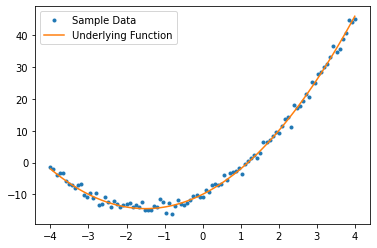

In [5]:
plt.plot(x.numpy(), y.numpy(), '.', label='Sample Data')
plt.plot(x, f(x), label='Underlying Function')
plt.legend();

Okay, assume that we have some measured data. Training the neural network is to learn the relationship between the input Xs and output Ys, specifically using the model.fit call. The process starts with an estimation, and measure the loss function, and use the opimizer to try another estimation until some satisficatory result could be reached. It will continue the looping process according to **epochs** (i.e. 25). 

In [6]:
history = model.fit(x, y, epochs=25)
model.save('./my_first_modelv2')

Epoch 1/25
4/4 [==============================] - 1s 8ms/step - loss: 282.5216
Epoch 2/25
4/4 [==============================] - 0s 10ms/step - loss: 215.4441
Epoch 3/25
4/4 [==============================] - 0s 8ms/step - loss: 143.1381
Epoch 4/25
4/4 [==============================] - 0s 6ms/step - loss: 105.0275
Epoch 5/25
4/4 [==============================] - 0s 8ms/step - loss: 76.0090
Epoch 6/25
4/4 [==============================] - 0s 9ms/step - loss: 58.8018
Epoch 7/25
4/4 [==============================] - 0s 11ms/step - loss: 50.8188
Epoch 8/25
4/4 [==============================] - 0s 8ms/step - loss: 45.1737
Epoch 9/25
4/4 [==============================] - 0s 9ms/step - loss: 39.4381
Epoch 10/25
4/4 [==============================] - 0s 6ms/step - loss: 36.9586
Epoch 11/25
4/4 [==============================] - 0s 9ms/step - loss: 34.1346
Epoch 12/25
4/4 [==============================] - 0s 9ms/step - loss: 32.2052
Epoch 13/25
4/4 [==============================] - 0s 9

## 4) Test and Evaluate the Model

Let's see how good (or bad) our model is.

For example, say we have another input x=4 (choose one value that does appear in the data set), what is the prediction from the model? Compare it with the direct calcuation from the underlying equation. How good (or bad) is your prediction?

In [7]:
result = model.predict([4.0])
print(result)

1/1 [==============================] - 0s 105ms/step
[[41.991642]]


We can also see the progress of Neuron Network training progress by plotting the Loss Function with Epoch.

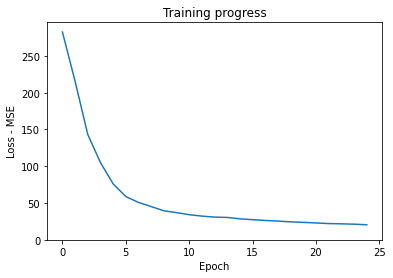

In [8]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylim([0, max(plt.ylim())])
plt.ylabel('Loss - MSE')
plt.title('Training progress');

Next, use the new dataset to test the model. **Remember that we should always use '*unseen*' data to verify the model!** 

Let's plot the model predications in comparison to the underlying function. This gives us some indications on the performance of the model.

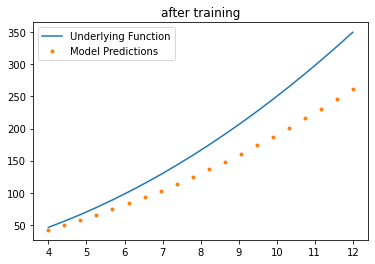

In [9]:
# The helper function to plot the model predication function and the underflying function
def plot_comparison(x, f, model, title):
  plt.figure()
  plt.plot(x, f(x), label='Underlying Function')
  plt.plot(x, model(x), '.', label='Model Predictions')
  plt.title(title)
  plt.legend()

x = tf.linspace(4, 12, 20)
x = tf.cast(x, tf.float32)
plot_comparison(x, f, model, "after training")

Last, we can check the weights of the model by executing the following codes. How do they compare to the coefficients of the underlying funcion $2x^2 + 6x - 10$?

In [10]:
print(model.layers[1].weights[0].numpy()) # return coefficients of x and x^2
print(model.layers[1].bias.numpy()) # return the bias/constant 

[[5.9472737]
 [1.348503 ]]
[-3.3734994]


## 5) **Exercise**

Question 1: briefly describe **the workflow** of developing an Neural Network Application?

Question 2: try to use different values for **epochs**. Describe the Traning **Loss Curve**. How could the choice of epochs affect the performance of the model? **Note that to retrain the model, we need to start again from the Configration steps.** 

Question 3: try to use different values for the **learning rate**. How could the choice of the learning rate affect the performance of the model? 

Question 4: find the optimal combination of **epochs** and **learning rate** that give you both efficiency and performance. Justify your choices. Note that the optimal combination is always data dependent, and the only way to find it out is experimentation.

Question 5: Why is there **a difference** of curves of model predictions and underlying function  ?

# Experiment 2 Wireless Communication Systems

In this experiment, we will model and simulate Wireless Communication System based on the open-source framework: **NVIDIA Sionna**. It has native support for integrating TensorFlow/Keras models into the simulation. And it has become an attractive tool for performing AI-enhanced Wireless research.

This experiment is adapted from the Siona's tutorial - [Advanced Link-level Simulations](https://nvlabs.github.io/sionna/examples/Sionna_tutorial_part3.html#). We will model and simulate a realistic OFDM point-to-point link between a mobile user terminal (UT) and a base station (BS). The schematic diagram of the model is given as below:

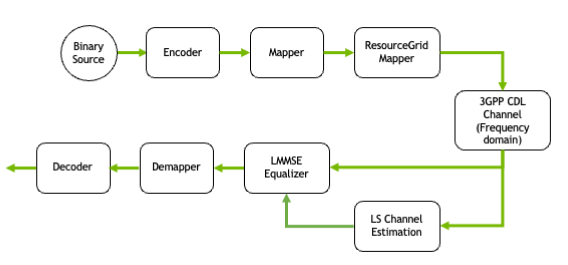

## 1) Import Libraries and Settings
The first step is to import libraries required in this simulation.

In [11]:
# import tensorflow
import tensorflow as tf
from tensorflow.keras import Model

gpus = tf.config.list_physical_devices('GPU')
print('Number of GPUs available :', len(gpus))
if gpus:
    gpu_num = 0 # Number of the GPU to be used
    try:
        tf.config.set_visible_devices(gpus[gpu_num], 'GPU')
        print('Only GPU number', gpu_num, 'used.')
        tf.config.experimental.set_memory_growth(gpus[gpu_num], True)
    except RuntimeError as e:
        print(e)

# import common python libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle
import time

# Import Sionna
try:
    import sionna as sn
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna as sn

from sionna.mimo import StreamManagement

from sionna.ofdm import ResourceGrid, ResourceGridMapper, LSChannelEstimator, LMMSEEqualizer
from sionna.ofdm import OFDMModulator, OFDMDemodulator, ZFPrecoder, RemoveNulledSubcarriers

from sionna.channel.tr38901 import AntennaArray, CDL, Antenna
from sionna.channel import subcarrier_frequencies, cir_to_ofdm_channel, cir_to_time_channel, time_lag_discrete_time_channel
from sionna.channel import ApplyOFDMChannel, ApplyTimeChannel, OFDMChannel, TimeChannel

from sionna.fec.ldpc.encoding import LDPC5GEncoder
from sionna.fec.ldpc.decoding import LDPC5GDecoder

from sionna.mapping import Mapper, Demapper

from sionna.utils import BinarySource, ebnodb2no, sim_ber, PlotBER
from sionna.utils.metrics import compute_ber

Number of GPUs available : 0


For any type of MIMO simulations, it is required to setup a `StreamManagement object`. It determines which transmitters and receivers communicate data streams with each other. 

In this experiment, we will configure a **single UT** (equipped with a **single antenna**) and a **single BS** (equipped with **multiple antennas**). 

We configure the system such that the number of streams per transmitter (in both uplink and donwlink) is equal to the number of UT antennas.

In [12]:
# Define the number of UT and BS antennas
NUM_UT = 1
NUM_BS = 1
NUM_UT_ANT = 1
NUM_BS_ANT = 4

# The number of transmitted streams is equal to the number of UT antennas
# in both uplink and downlink
NUM_STREAMS_PER_TX = NUM_UT_ANT

# Create an RX-TX association matrix.
# RX_TX_ASSOCIATION[i,j]=1 means that receiver i gets at least one stream
# from transmitter j. Depending on the transmission direction (uplink or downlink),
# the role of UT and BS can change.
# For example, considering a system with 2 RX and 4 TX, the RX-TX
# association matrix could be
# [ [1 , 1, 0, 0],
#   [0 , 0, 1, 1] ]
# which indicates that the RX 0 receives from TX 0 and 1, and RX 1 receives from
# TX 2 and 3.
#
# In this notebook, as we have only a single transmitter and receiver,
# the RX-TX association matrix is simply:
RX_TX_ASSOCIATION = np.array([[1]])

# Instantiate a StreamManagement object
# This determines which data streams are determined for which receiver.
# In this simple setup, this is fairly easy. However, it can get more involved
# for simulations with many transmitters and receivers.
sm = StreamManagement(RX_TX_ASSOCIATION, NUM_STREAMS_PER_TX)

## 2) Model Configuration and Setup

### a) OFDM Resource Grid
The frequency and time representation of placing symbols is the key to understand the operation of 4G and 5G. The transmitted symbols are explicitly mapped to different portion of the two-dimension representation, which consists of a subcarrier axis (frequency) and an OFDM symbol axis (time). This coordinate system is called **resource grid**. 

The resource grid contains data symbols and pilots. Let's create the resource grid that spans **76 subcarriers over 14 OFDM symbols with 4 data streams** (i.e. MIMO).

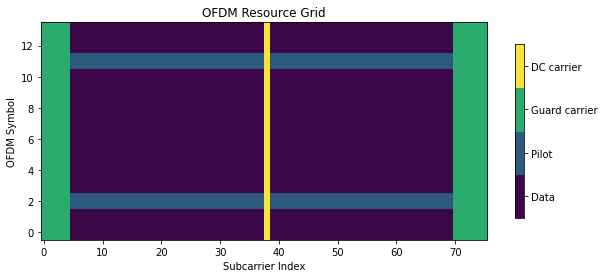

In [13]:
rg = ResourceGrid( num_ofdm_symbols=14,#the number of OFDM symbols
                   fft_size=76,#the number of subcarriers
                   subcarrier_spacing=30e3,# in Hz
                   num_tx=NUM_UT, # the number of transmitters
                   num_streams_per_tx=NUM_STREAMS_PER_TX,# the number of streams per transmitter
                   cyclic_prefix_length=6,# the length of Cyclic Prefix
                   num_guard_carriers=[5,6], # the length of Cyclic Prefix
                   dc_null=True, # the number of guardcarriers at the left and right side.
                   pilot_pattern="kronecker",
                   pilot_ofdm_symbol_indices=[2,11])#indices of OFDM symbols reserved for pilot transmissions
rg.show();

**Comment on the Resource Grid according to the parameter set in the Python codes**. 

Try to alter **some parameters** and observe the OFDM resource grid accordingly.

After some trials, restore the default parameters:
```
   num_ofdm_symbols=14,
   fft_size=76,
   num_tx=NUM_UT,
   num_streams_per_tx=NUM_STREAMS_PER_TX,
   cyclic_prefix_length=6,
   num_guard_carriers=[5,6],
   dc_null=True,
   pilot_pattern="kronecker",
   pilot_ofdm_symbol_indices=[2,11])
```

In the default example, it is observed that the resource grid spans 76 subcarriers over 14 OFDM symbols. A DC guard carrier as well as some guard carriers to the left and right of the spectrum are nulled. The third and twelfth OFDM symbol are dedicated to pilot transmissions.

Then let's look at the pilot pattern in detail, with the following codes. Note that DC and Guard carriers are not included, which effectively gives 64 subcarriers for data (including Pilots). **Do you know how the number of 64 is calculated?**

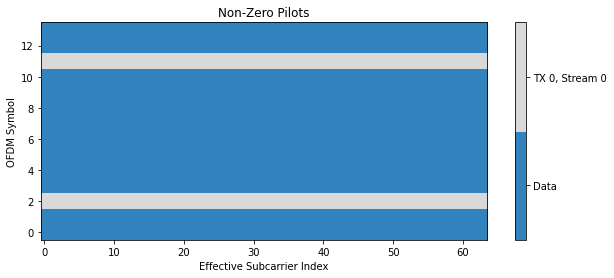

In [14]:
rg.pilot_pattern.show();

### b) Binary Source
Binary Source object can be created by the following code. 

In [15]:
# The binary source will create batches of information bits
binary_source = BinarySource()

### c) LDPC Forward Error Correction Encoder
5G LDPC FEC object can be created by the following code.

In [16]:
num_bits_per_symbol = 2 # QPSK modulation
coderate = 0.5 # Code rate
n = int(rg.num_data_symbols*num_bits_per_symbol) # Number of coded bits
k = int(n*coderate) # Number of information bits

# The encoder maps information bits to coded bits
encoder = LDPC5GEncoder(k, n)

### d) QAM Modulation
QAM Modulation object can be created as follow.

In [17]:
# The mapper maps blocks of information bits to constellation symbols
mapper = Mapper("qam", num_bits_per_symbol)

### e) OFDM Resource Grid Mapper
The resource grid mapper maps symbols onto an OFDM resource grid.

In [18]:
#map symbols onto an OFDM resource grid
rg_mapper = ResourceGridMapper(rg)


### f) Antennas
In this part, we configure the antenna arrays used by the UT and BS, as required in the Channel models, such as CDL from the 3GPP 38.901 specification. The following codes configure a typical antenna array.


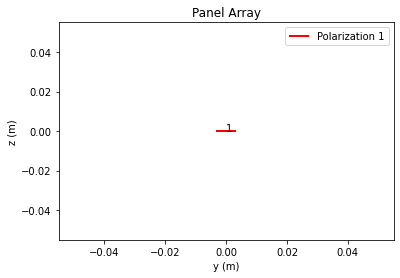

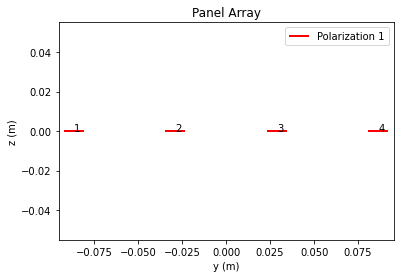

In [19]:
carrier_frequency = 2.6e9 # Carrier frequency in Hz.
                          # This is needed here to define the antenna element spacing.

ut_array = Antenna(  polarization="single",
                     polarization_type="H", 
                     antenna_pattern="38.901",
                     carrier_frequency=carrier_frequency)


bs_array = AntennaArray( num_rows=1,
                         num_cols=int(NUM_BS_ANT),
                         polarization="single",
                         polarization_type="H",
                         antenna_pattern="38.901", # Try 'omni'
                         carrier_frequency=carrier_frequency)

ut_array.show()
bs_array.show()

The **radiation pattern** of an individual antenna element is an important physical parameter of the system. The following codes will visualise the patterns.

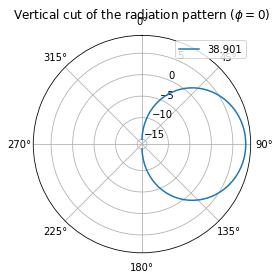

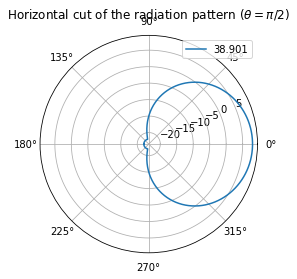

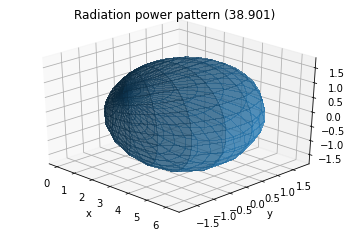

In [20]:
bs_array.show_element_radiation_pattern()

### g) Channel Model
3GPP TR 38.901 has several channel models such as Clustered Delay Line (CDL) and tapped delay line (TDL).

Clustered Delay Line (CDL) is a type of channel model when the received signal is composed of a number of separate delayed clusters. Each cluster contains a number of multipath components with the same delay but different Angle of Departure and Angle of Arrival. 

A CDL channel is considered in this experiment and its model can be created with the following codes.

**The models “A”, “B”, and “C” are non-line-of-sight (NLOS) models, while “D” and “E” are LOS.**


In [21]:
delay_spread = 100e-9 # Nominal delay spread in [s]. 

direction = "uplink"  # The `direction` determines if the UT or BS is transmitting.
                      # In the `uplink`, the UT is transmitting.
cdl_model = "C"       # Suitable values are ["A", "B", "C", "D", "E"]

speed = 10            # UT speed [m/s]. BSs are always assumed to be fixed.
                      # The direction of travel will chosen randomly within the x-y plane.

# cdl() will generate Channel Impulse Respones (CIRs) that can be converted to discrete time or discrete frequency.
cdl = CDL(cdl_model, delay_spread, carrier_frequency, ut_array, bs_array, direction, min_speed=speed)

The instance cdl of the CDL ChannelModel can be used to generate batches of random realizations of continuous-time channel impulse responses, consisting of complex gains a and delays tau for each path. 

To account for time-varying channels, a channel impulse responses is sampled at the `sampling_frequency` for `num_time_samples` samples. 


In [22]:
batch_size = 64 # How many examples are processed by Sionna in parallel

a, tau = cdl(batch_size=32, num_time_steps=rg.num_ofdm_symbols, sampling_frequency=1/rg.ofdm_symbol_duration)

The path gains`a` have shape `[batch size, num_rx, num_rx_ant, num_tx, num_tx_ant, num_paths, num_time_steps]`.

The delays `tau` have shape `[batch_size, num_rx, num_tx, num_paths]`.

In [23]:
print("Shape of the path gains: ", a.shape)
print("Shape of the delays:", tau.shape)

Shape of the path gains:  (32, 1, 4, 1, 1, 24, 14)
Shape of the delays: (32, 1, 1, 24)


The following codes plot two figures that depict the channel impulse response at a particular time instant and the time-evolution of the gain of one path.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


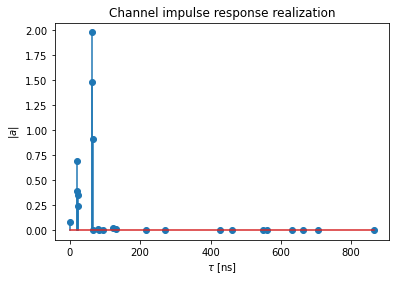

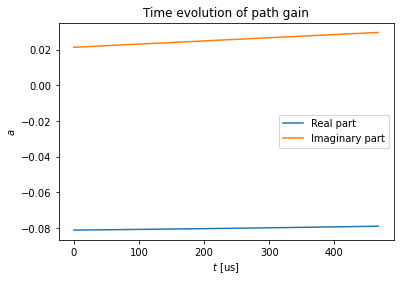

In [24]:
plt.figure()
plt.title("Channel impulse response realization")
plt.stem(tau[0,0,0,:]/1e-9, np.abs(a)[0,0,0,0,0,:,0])
plt.xlabel(r"$\tau$ [ns]")
plt.ylabel(r"$|a|$")


plt.figure()
plt.title("Time evolution of path gain")
plt.plot(np.arange(rg.num_ofdm_symbols)*rg.ofdm_symbol_duration/1e-6, np.real(a)[0,0,0,0,0,0,:])
plt.plot(np.arange(rg.num_ofdm_symbols)*rg.ofdm_symbol_duration/1e-6, np.imag(a)[0,0,0,0,0,0,:])
plt.legend(["Real part", "Imaginary part"])

plt.xlabel(r"$t$ [us]")
plt.ylabel(r"$a$");

 The corresponding **Channel Frequency Response** can be calculated with the following codes.

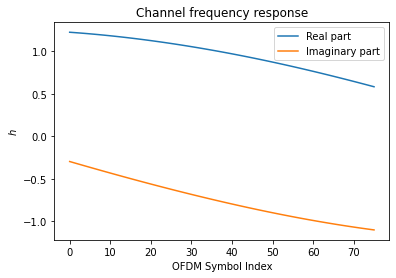

In [25]:
frequencies = subcarrier_frequencies(rg.fft_size, rg.subcarrier_spacing)
h_freq = cir_to_ofdm_channel(frequencies, a, tau, normalize=True)

plt.figure()
plt.title("Channel frequency response")
plt.plot(np.real(h_freq[0,0,0,0,0,0,:]))
plt.plot(np.imag(h_freq[0,0,0,0,0,0,:]))
plt.xlabel("OFDM Symbol Index")
plt.ylabel(r"$h$")
plt.legend(["Real part", "Imaginary part"]);

The below function will apply the channel frequency response to an input signal.

In [26]:
# Apply the channel frequency response to an input signal
channel = OFDMChannel(cdl, rg, add_awgn=True, normalize_channel=True, return_channel=True)


#### **Question**
1. **Explain what channel impulse response and path gain are.**


### h) Least Square Channel (LS) Estimation

In [27]:
# This function removes nulled subcarriers from any tensor having the shape of a resource grid
remove_nulled_scs = RemoveNulledSubcarriers(rg)

# The LS channel estimator will provide channel estimates and error variances
ls_est = LSChannelEstimator(rg, interpolation_type="nn")

### l) Linear Minimum Mean Square Error (LMMSE) Equalizer

In [28]:
# The LMMSE equalizer will provide soft symbols together with noise variance estimates
lmmse_equ = LMMSEEqualizer(rg, sm)

### j) QAM Demodulation

In [29]:
# The demapper produces LLR for all coded bits
demapper = Demapper("app", "qam", num_bits_per_symbol)

### k) LDPC Decoder

In [30]:
# The decoder provides hard-decisions on the information bits
decoder = LDPC5GDecoder(encoder, hard_out=True)

## 3) Simulations
Now it's time to have all those configured objects into one full system simulation (end-to-end). 

### a) Uplink Transmission in the Frequency Domain
Study the code and understand how it works.Then execute it to observe the output.


In [31]:
batch_size = 256 # Depending on the memory of your GPU (or system when a CPU is used),
                # you can in(de)crease the batch size. The larger the batch size, the
                # more memory is required. However, simulations will also run much faster.
ebno_db = 0 #signal to noise per bit

# Compute the noise power for a given Eb/No value.
# This takes not only the coderate but also the overheads related pilot
# transmissions and nulled carriers
no = ebnodb2no( ebno_db=ebno_db,
                num_bits_per_symbol=num_bits_per_symbol,
                coderate=coderate,
                resource_grid=rg)

# Transmitter
bits = binary_source([batch_size, NUM_UT, rg.num_streams_per_tx, k])
print("Shape of bits: ", bits.shape)

codewords = encoder(bits)
print("Shape of codewords: ", codewords.shape)

x = mapper(codewords)
#print("Shape of x: ", x.shape)

x_rg = rg_mapper(x)
#print("Shape of x_rg: ", x_rg.shape)

# Channel
y, h_freq = channel([x_rg, no])
#print("Shape of y_rg: ", y.shape)
#print("Shape of h_freq: ", h_freq.shape)

# Receiver
h_hat, err_var = ls_est ([y, no])
#print("Shape of h_hat: ", h_hat.shape)
#print("Shape of err_var: ", err_var.shape)

x_hat, no_eff = lmmse_equ([y, h_hat, err_var, no])
#print("Shape of x_hat: ", x_hat.shape)
#print("Shape of no_eff: ", no_eff.shape)

llr = demapper([x_hat, no_eff])
#print("Shape of llr: ", llr.shape)

bits_hat = decoder(llr)
#print("Shape of bits_hat: ", bits_hat.shape)

ber = compute_ber(bits, bits_hat)
print("BER: {}".format(ber))

Shape of bits:  (256, 1, 1, 768)
Shape of codewords:  (256, 1, 1, 1536)
BER: 0.17209370930989584


#### **Question**: 
1. **What is the minimum Eb/No (signal to noise per bit) required to realise error free communication?**

### b) Create an End-to-End Keras Model
It is often convenient to pack all above Python codes into a single Keras model that outputs batches of transmitted and received information bits at a given Eb/No point. 

Besides,  a boolean given as parameter to the initializer enables using either **LS estimation** or **perfect CSI**, as shown in the figure below.

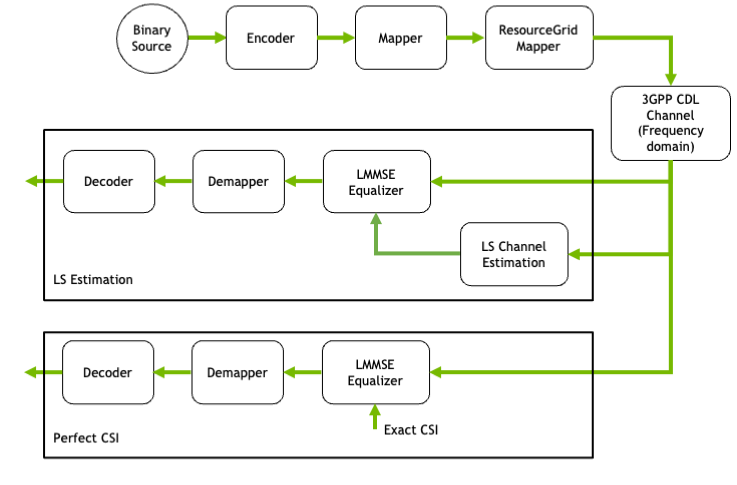

In [32]:
class OFDMSystem(Model): # Inherits from Keras Model

    def __init__(self, perfect_csi):
        super().__init__() # Must call the Keras model initializer

        self.perfect_csi = perfect_csi

        n = int(rg.num_data_symbols*num_bits_per_symbol) # Number of coded bits
        k = int(n*coderate) # Number of information bits
        self.k = k

        # The binary source will create batches of information bits
        self.binary_source = BinarySource()

        # The encoder maps information bits to coded bits
        self.encoder = LDPC5GEncoder(k, n)

        # The mapper maps blocks of information bits to constellation symbols
        self.mapper = Mapper("qam", num_bits_per_symbol)

        # The resource grid mapper maps symbols onto an OFDM resource grid
        self.rg_mapper = ResourceGridMapper(rg)

        # Frequency domain channel
        self.channel = OFDMChannel(cdl, rg, add_awgn=True, normalize_channel=True, return_channel=True)

        # The LS channel estimator will provide channel estimates and error variances
        self.ls_est = LSChannelEstimator(rg, interpolation_type="nn")

        # The LMMSE equalizer will provide soft symbols together with noise variance estimates
        self.lmmse_equ = LMMSEEqualizer(rg, sm)

        # The demapper produces LLR for all coded bits
        self.demapper = Demapper("app", "qam", num_bits_per_symbol)

        # The decoder provides hard-decisions on the information bits
        self.decoder = LDPC5GDecoder(self.encoder, hard_out=True)

    @tf.function # Graph execution to speed things up
    def __call__(self, batch_size, ebno_db):
        no = sn.utils.ebnodb2no(ebno_db, num_bits_per_symbol=num_bits_per_symbol, coderate=coderate, resource_grid=rg)

        # Transmitter
        bits = self.binary_source([batch_size, NUM_UT, rg.num_streams_per_tx, self.k])
        codewords = self.encoder(bits)
        x = self.mapper(codewords)
        x_rg = self.rg_mapper(x)

        # Channel
        y, h_freq = self.channel([x_rg, no])

        # Receiver
        if self.perfect_csi:
            h_hat, err_var = remove_nulled_scs(h_freq), 0.
        else:
            h_hat, err_var = self.ls_est ([y, no])
        x_hat, no_eff = self.lmmse_equ([y, h_hat, err_var, no])
        llr = self.demapper([x_hat, no_eff])
        bits_hat = self.decoder(llr)

        return bits, bits_hat

### c) OFDM Simulation using a Keras Model
Based on the Keras Model, we will simulate the link performace over a range of SNR.

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


EbNo [dB] |        BER |       BLER |  bit errors |    num bits | block errors |  num blocks | runtime [s] |    status
---------------------------------------------------------------------------------------------------------------------------------------
    -10.0 | 4.5678e-01 | 1.0000e+00 |       44903 |       98304 |          128 |         128 |        24.0 |reached target block errors
   -9.417 | 4.4983e-01 | 1.0000e+00 |       44220 |       98304 |          128 |         128 |         3.7 |reached target block errors
   -8.833 | 4.4341e-01 | 1.0000e+00 |       43589 |       98304 |          128 |         128 |         4.2 |reached target block errors
    -8.25 | 4.3326e-01 | 1.0000e+00 |       42591 |       98304 |          128 |         128 |         3.4 |reached target block errors
   -7.667 | 4.2513e-01 | 1.0000e+00 |       41792 |       98304 |          128 |         128 |         1.9 |reached target block errors
   -7.083 | 4.1656e-01 | 1.0000e+00 |       40950 |       98304 |

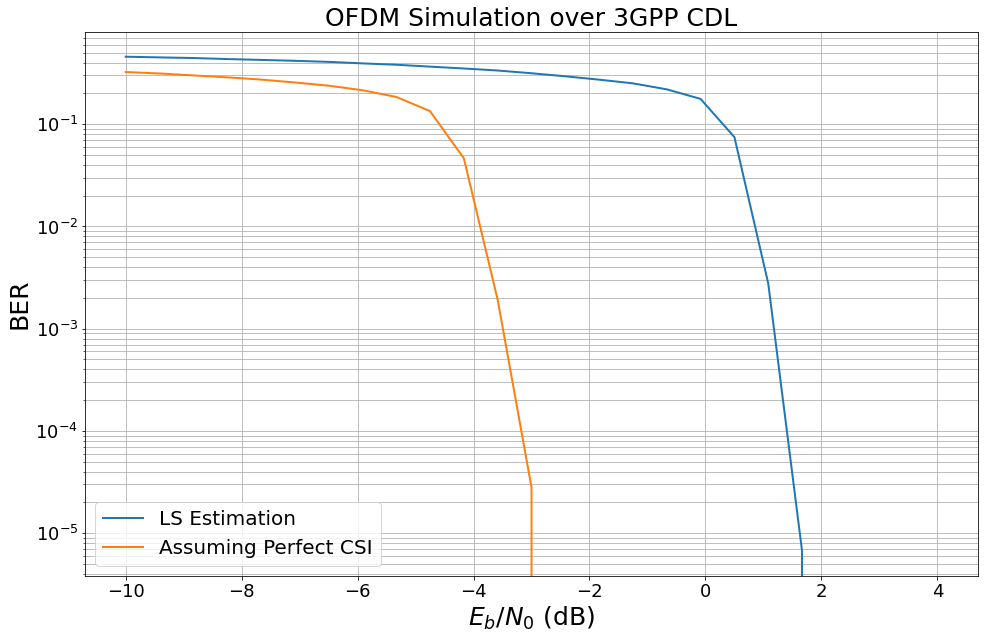

In [33]:
EBN0_DB_MIN = -10.0 # Minimum value of Eb/N0 [dB] for simulations
EBN0_DB_MAX = 4.0 # Maximum value of Eb/N0 [dB] for simulations
BATCH_SIZE = 64

ber_plots = PlotBER("OFDM Simulation over 3GPP CDL")

model_ls = OFDMSystem(False)
ber_plots.simulate(model_ls,
                  ebno_dbs=np.linspace(EBN0_DB_MIN, EBN0_DB_MAX, 25),
                  batch_size=BATCH_SIZE,
                  num_target_block_errors=100, # simulate until 100 block errors occured
                  legend="LS Estimation",
                  soft_estimates=True,
                  max_mc_iter=100, # run 100 Monte-Carlo simulations (each with batch_size samples)
                  show_fig=False);

model_pcsi = OFDMSystem(True)
ber_plots.simulate(model_pcsi,
                  ebno_dbs=np.linspace(EBN0_DB_MIN, EBN0_DB_MAX, 25),
                  batch_size=BATCH_SIZE,
                  num_target_block_errors=100, # simulate until 100 block errors occured
                  legend="Assuming Perfect CSI",
                  soft_estimates=True,
                  max_mc_iter=100, # run 100 Monte-Carlo simulations (each with batch_size samples)
                  show_fig=False);

ber_plots();

## 4) **Exercise**

Question 1: Explain the **Workflow** of the OFDM simulation.

Question 2: Explain how **channel estimation** works.

Question 3: Observe and comment on **BER performance** between perfect CSI and LS estimation

Question 4: Observe and comment **Uplink performance** over different CDL models.

Question 5: Explain how **BATCH_SIZE** would affect the simulation in terms of speed and accuracy.




# Experiment 3 Neural Network Receiver

This experiment is to **train a neural receiver** that implements OFDM detection. The neural receiver substitutes the conventional blocks of channel estimation, equalization, and demapping.  This experiment is adapted from the Siona's tutorial - [Neural Receiver](https://nvlabs.github.io/sionna/examples/Neural_Receiver.html#).

It takes as input the post-DFT (discrete Fourier transform) received samples, which form the received resource grid, and computes log-likelihood ratios (LLRs) on the transmitted coded bits. These LLRs are then fed to the outer decoder to reconstruct the transmitted information bits.

The schematic diagram of the models are illustrated as below. And two reference models are considered for benchmarking
1. Perfect CSI (**Exact Channel Response**)
2. LS Estimation (**Estimated Channel Response based on Pilots**)
3. **Neural Network (NN) based Receiver**

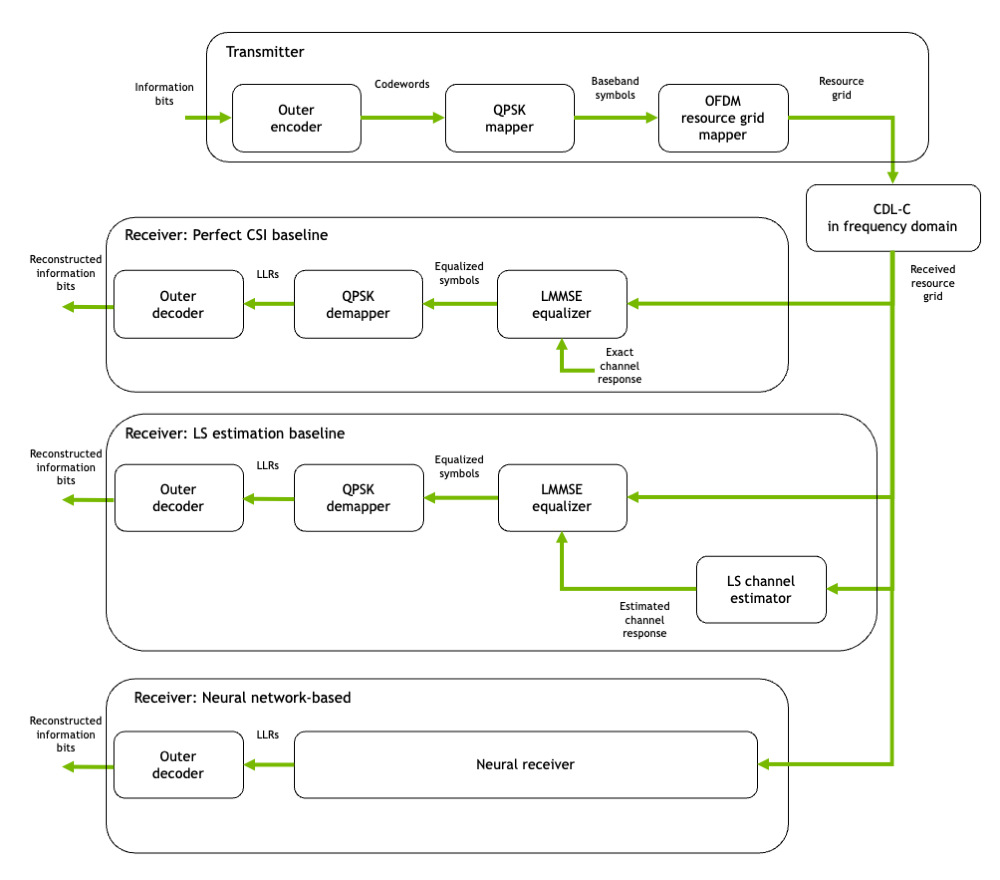

## 1) Import Libraries and General Setting
Again, the first step is to import required libraries into the program.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Layer, Conv2D, LayerNormalization
from tensorflow.nn import relu

# Import Sionna
try:
    import sionna
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna

from sionna.channel.tr38901 import Antenna, AntennaArray, CDL
from sionna.channel import OFDMChannel
from sionna.mimo import StreamManagement
from sionna.ofdm import ResourceGrid, ResourceGridMapper, LSChannelEstimator, LMMSEEqualizer, RemoveNulledSubcarriers, ResourceGridDemapper
from sionna.utils import BinarySource, ebnodb2no, insert_dims, flatten_last_dims, log10, expand_to_rank
from sionna.fec.ldpc.encoding import LDPC5GEncoder
from sionna.fec.ldpc.decoding import LDPC5GDecoder
from sionna.mapping import Mapper, Demapper
from sionna.utils.metrics import compute_ber
from sionna.utils import sim_ber

## 2) Communication Model Parameters 
Simulation parameters are initialised below.

In [ ]:

############################################
##  The StreamManagement class is used to configure the receiver-transmitter association and the number of streams per transmitter.
stream_manager = StreamManagement(np.array([[1]]), # Receiver-transmitter association matrix
                                  1)               # One stream per transmitter

############################################
## Channel configuration
carrier_frequency = 3.5e9 # Hz
delay_spread = 100e-9 # s
cdl_model = "C" # CDL model to use
speed = 10.0 # Speed for evaluation and training [m/s]
# SNR range for evaluation and training [dB]
ebno_db_min = -5.0
ebno_db_max = 10.0

############################################
## OFDM waveform configuration
subcarrier_spacing = 30e3 # Hz
fft_size = 128 # Number of subcarriers forming the resource grid, including the null-subcarrier and the guard bands
num_ofdm_symbols = 14 # Number of OFDM symbols forming the resource grid
dc_null = True # Null the DC subcarrier
num_guard_carriers = [5, 6] # Number of guard carriers on each side
pilot_pattern = "kronecker" # Pilot pattern
pilot_ofdm_symbol_indices = [2, 11] # Index of OFDM symbols carrying pilots
cyclic_prefix_length = 0 # Simulation in frequency domain. This is useless

############################################
## Modulation and coding configuration
num_bits_per_symbol = 2 # QPSK
coderate = 0.5 # Coderate for LDPC code

############################################
## The ResourceGrid class is used to configure the OFDM resource grid. 
resource_grid = ResourceGrid(num_ofdm_symbols = num_ofdm_symbols,
                             fft_size = fft_size,
                             subcarrier_spacing = subcarrier_spacing,
                             num_tx = 1,
                             num_streams_per_tx = 1,
                             cyclic_prefix_length = cyclic_prefix_length,
                             dc_null = dc_null,
                             pilot_pattern = pilot_pattern,
                             pilot_ofdm_symbol_indices = pilot_ofdm_symbol_indices,
                             num_guard_carriers = num_guard_carriers)

# Codeword length. It is calculated from the total number of databits carried by the resource grid, and the number of bits transmitted per resource element
n = int(resource_grid.num_data_symbols*num_bits_per_symbol)
# Number of information bits per codeword
k = int(n*coderate)

############################################
## Neural receiver configuration
num_conv_channels = 128 # Number of convolutional channels for the convolutional layers forming the neural receiver

############################################
## Training configuration
num_training_iterations = 30000 # Number of training iterations
training_batch_size = 128 # Training batch size
model_weights_path = "neural_receiver_weights" # Location to save the neural receiver weights once training is done

############################################
## Evaluation configuration
results_filename = "neural_receiver_results" # Location to save the results

############################################
## The SIMO link is setup by considering an uplink transmission with one user terminal (UT) 
## equipped with a single non-polarized antenna, and a base station (BS) equipped with an antenna array. 
ut_antenna = Antenna(polarization="single",
                     polarization_type="H",
                     antenna_pattern="38.901",
                     carrier_frequency=carrier_frequency)

bs_array = AntennaArray(num_rows=1,
                        num_cols=1,
                        polarization="dual",
                        polarization_type="VH",
                        antenna_pattern="38.901",
                        carrier_frequency=carrier_frequency)
ut_antenna.show()
bs_array.show()

## 3) Neural Network Receiver
A neural receiver  is implemented based on using residual convolutional layers. Convolutional layers are leveraged to efficienly process the 2D resource grid.

For convinience, a Keras layer that implements a residual block is first defined. The Keras layer that implements the neural receiver is built by stacking such blocks. The following figure shows the architecture of the neural receiver.

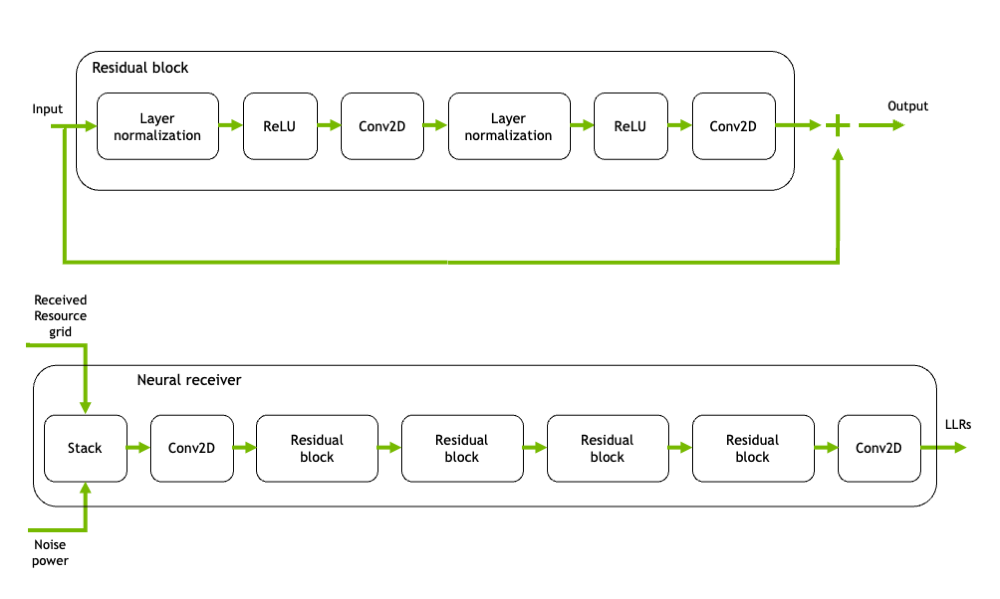

The above architectures are implemented as below.

In [ ]:
class ResidualBlock(Layer):
    r"""
    This Keras layer implements a convolutional residual block made of two convolutional layers with ReLU activation, layer normalization, and a skip connection.
    The number of convolutional channels of the input must match the number of kernel of the convolutional layers ``num_conv_channel`` for the skip connection to work.

    Input
    ------
    : [batch size, num time samples, num subcarriers, num_conv_channel], tf.float
        Input of the layer

    Output
    -------
    : [batch size, num time samples, num subcarriers, num_conv_channel], tf.float
        Output of the layer
    """

    def build(self, input_shape):

        # Layer normalization is done over the last three dimensions: time, frequency, conv 'channels'
        self._layer_norm_1 = LayerNormalization(axis=(-1, -2, -3))
        self._conv_1 = Conv2D(filters=num_conv_channels,
                              kernel_size=[3,3],
                              padding='same',
                              activation=None)
        # Layer normalization is done over the last three dimensions: time, frequency, conv 'channels'
        self._layer_norm_2 = LayerNormalization(axis=(-1, -2, -3))
        self._conv_2 = Conv2D(filters=num_conv_channels,
                              kernel_size=[3,3],
                              padding='same',
                              activation=None)

    def call(self, inputs):
        z = self._layer_norm_1(inputs)
        z = relu(z)
        z = self._conv_1(z)
        z = self._layer_norm_2(z)
        z = relu(z)
        z = self._conv_2(z) # [batch size, num time samples, num subcarriers, num_channels]
        # Skip connection
        z = z + inputs

        return z

class NeuralReceiver(Layer):
    r"""
    Keras layer implementing a residual convolutional neural receiver.

    This neural receiver is fed with the post-DFT received samples, forming a resource grid of size num_of_symbols x fft_size, and computes LLRs on the transmitted coded bits.
    These LLRs can then be fed to an outer decoder to reconstruct the information bits.

    As the neural receiver is fed with the entire resource grid, including the guard bands and pilots, it also computes LLRs for these resource elements.
    They must be discarded to only keep the LLRs corresponding to the data-carrying resource elements.

    Input
    ------
    y : [batch size, num rx antenna, num ofdm symbols, num subcarriers], tf.complex
        Received post-DFT samples.

    no : [batch size], tf.float32
        Noise variance. At training, a different noise variance value is sampled for each batch example.

    Output
    -------
    : [batch size, num ofdm symbols, num subcarriers, num_bits_per_symbol]
        LLRs on the transmitted bits.
        LLRs computed for resource elements not carrying data (pilots, guard bands...) must be discarded.
    """

    def build(self, input_shape):

        # Input convolution
        self._input_conv = Conv2D(filters=num_conv_channels,
                                  kernel_size=[3,3],
                                  padding='same',
                                  activation=None)
        # Residual blocks
        self._res_block_1 = ResidualBlock()
        self._res_block_2 = ResidualBlock()
        self._res_block_3 = ResidualBlock()
        self._res_block_4 = ResidualBlock()
        # Output conv
        self._output_conv = Conv2D(filters=num_bits_per_symbol,
                                   kernel_size=[3,3],
                                   padding='same',
                                   activation=None)

    def call(self, inputs):
        y, no = inputs

        # Feeding the noise power in log10 scale helps with the performance
        no = log10(no)

        # Stacking the real and imaginary components of the different antennas along the 'channel' dimension
        y = tf.transpose(y, [0, 2, 3, 1]) # Putting antenna dimension last
        no = insert_dims(no, 3, 1)
        no = tf.tile(no, [1, y.shape[1], y.shape[2], 1])
        # z : [batch size, num ofdm symbols, num subcarriers, 2*num rx antenna + 1]
        z = tf.concat([tf.math.real(y),
                       tf.math.imag(y),
                       no], axis=-1)
        # Input conv
        z = self._input_conv(z)
        # Residual blocks
        z = self._res_block_1(z)
        z = self._res_block_2(z)
        z = self._res_block_3(z)
        z = self._res_block_4(z)
        # Output conv
        z = self._output_conv(z)

        return z

The **Loss function** is defined as the inverse of Bit-Metric Decoding (BMD)Rate. It is defined as

\begin{equation}
R = 1 - \frac{1}{SNMK} \sum_{s = 0}^{S-1} \sum_{n = 0}^{N-1} \sum_{m = 0}^{M-1} \sum_{k = 0}^{K-1} \texttt{BCE} \left( B_{s,n,m,k}, \texttt{LLR}_{s,n,m,k} \right)
\end{equation}

where

* $S$ is the batch size
* $N$ the number of subcarriers
* $M$ the number of OFDM symbols
* $K$ the number of bits per symbol
* $B_{s,n,m,k}$ the $k^{th}$ coded bit transmitted on the resource element $(n,m)$ and for the $s^{th}$ batch example
* $\texttt{LLR}_{s,n,m,k}$ the LLR (logit) computed by the neural receiver corresponding to the $k^{th}$ coded bit transmitted on the resource element $(n,m)$ and for the $s^{th}$ batch example
* $\texttt{BCE} \left( \cdot, \cdot \right)$ the binary cross-entropy in log base 2

It can be implemented as 
~~~
bce = tf.nn.sigmoid_cross_entropy_with_logits(c, llr)
bce = tf.reduce_mean(bce)
rate = tf.constant(1.0, tf.float32) - bce/tf.math.log(2.)
~~~

## 4) End-to-end System as a Keras Model
Based on the above code, End-to-end System as a Keras Model can be implemented as follows.

In [ ]:
class E2ESystem(Model):
    """
    Keras model that implements the end-to-end systems.

    As the three considered end-to-end systems (perfect CSI baseline, LS estimation baseline, and neural receiver) share most of
    the link components (transmitter, channel model, outer code...), they are implemented using the same Keras model.

    When instantiating the Keras model, the parameter ``system`` is used to specify the system to setup,
    and the parameter ``training`` is used to specified if the system is instantiated to be trained or to be evaluated.
    The ``training`` parameter is only relevant when the neural network.

    At each call of this model:
    * A batch of codewords is randomly sampled, modulated, and mapped to resource grids to form the channel inputs
    * A batch of channel realizations is randomly sampled and applied to the channel inputs
    * The receiver is executed on the post-DFT received samples to compute LLRs on the coded bits.
      Which receiver is executed (baseline with perfect CSI knowledge, baseline with LS estimation, or neural receiver) depends
      on the specified ``system`` parameter.
    * If not training, the outer decoder is applied to reconstruct the information bits
    * If training, the BMD rate is estimated over the batch from the LLRs and the transmitted bits

    Parameters
    -----------
    system : str
        Specify the receiver to use. Should be one of 'baseline-perfect-csi', 'baseline-ls-estimation' or 'neural-receiver'

    training : bool
        Set to `True` if the system is instantiated to be trained. Set to `False` otherwise. Defaults to `False`.
        If the system is instantiated to be trained, the outer encoder and decoder are not instantiated as they are not required for training.
        This significantly reduces the computational complexity of training.
        If training, the bit-metric decoding (BMD) rate is computed from the transmitted bits and the LLRs. The BMD rate is known to be
        an achievable information rate for BICM systems, and therefore training of the neural receiver aims at maximizing this rate.

    Input
    ------
    batch_size : int
        Batch size

    no : scalar or [batch_size], tf.float
        Noise variance.
        At training, a different noise variance should be sampled for each batch example.

    Output
    -------
    If ``training`` is set to `True`, then the output is a single scalar, which is an estimation of the BMD rate computed over the batch. It
    should be used as objective for training.
    If ``training`` is set to `False`, the transmitted information bits and their reconstruction on the receiver side are returned to
    compute the block/bit error rate.
    """

    def __init__(self, system, training=False):
        super().__init__()
        self._system = system
        self._training = training

        ######################################
        ## Transmitter
        self._binary_source = BinarySource()
        # To reduce the computational complexity of training, the outer code is not used when training,
        # as it is not required
        if not training:
            self._encoder = LDPC5GEncoder(k, n)
        self._mapper = Mapper("qam", num_bits_per_symbol)
        self._rg_mapper = ResourceGridMapper(resource_grid)

        ######################################
        ## Channel
        # A 3GPP CDL channel model is used
        cdl = CDL(cdl_model, delay_spread, carrier_frequency,
                  ut_antenna, bs_array, "uplink", min_speed=speed)
        self._channel = OFDMChannel(cdl, resource_grid, normalize_channel=True, return_channel=True)

        ######################################
        ## Receiver
        # Three options for the receiver depending on the value of `system`
        if "baseline" in system:
            if system == 'baseline-perfect-csi': # Perfect CSI
                self._removed_null_subc = RemoveNulledSubcarriers(resource_grid)
            elif system == 'baseline-ls-estimation': # LS estimation
                self._ls_est = LSChannelEstimator(resource_grid, interpolation_type="nn")
            # Components required by both baselines
            self._lmmse_equ = LMMSEEqualizer(resource_grid, stream_manager, )
            self._demapper = Demapper("app", "qam", num_bits_per_symbol)
        elif system == "neural-receiver": # Neural receiver
            self._neural_receiver = NeuralReceiver()
            self._rg_demapper = ResourceGridDemapper(resource_grid, stream_manager) # Used to extract data-carrying resource elements
        # To reduce the computational complexity of training, the outer code is not used when training,
        # as it is not required
        if not training:
            self._decoder = LDPC5GDecoder(self._encoder, hard_out=True)

    @tf.function
    def call(self, batch_size, ebno_db):

        # If `ebno_db` is a scalar, a tensor with shape [batch size] is created as it is what is expected by some layers
        if len(ebno_db.shape) == 0:
            ebno_db = tf.fill([batch_size], ebno_db)

        ######################################
        ## Transmitter
        no = ebnodb2no(ebno_db, num_bits_per_symbol, coderate)
        # Outer coding is only performed if not training
        if self._training:
            c = self._binary_source([batch_size, 1, 1, n])
        else:
            b = self._binary_source([batch_size, 1, 1, k])
            c = self._encoder(b)
        # Modulation
        x = self._mapper(c)
        x_rg = self._rg_mapper(x)

        ######################################
        ## Channel
        # A batch of new channel realizations is sampled and applied at every inference
        no_ = expand_to_rank(no, tf.rank(x_rg))
        y,h = self._channel([x_rg, no_])

        ######################################
        ## Receiver
        # Three options for the receiver depending on the value of ``system``
        if "baseline" in self._system:
            if self._system == 'baseline-perfect-csi':
                h_hat = self._removed_null_subc(h) # Extract non-null subcarriers
                err_var = 0.0 # No channel estimation error when perfect CSI knowledge is assumed
            elif self._system == 'baseline-ls-estimation':
                h_hat, err_var = self._ls_est([y, no]) # LS channel estimation with nearest-neighbor
            x_hat, no_eff = self._lmmse_equ([y, h_hat, err_var, no]) # LMMSE equalization
            no_eff_= expand_to_rank(no_eff, tf.rank(x_hat))
            llr = self._demapper([x_hat, no_eff_]) # Demapping
        elif self._system == "neural-receiver":
            # The neural receover computes LLRs from the frequency domain received symbols and N0
            y = tf.squeeze(y, axis=1)
            llr = self._neural_receiver([y, no])
            llr = insert_dims(llr, 2, 1) # Reshape the input to fit what the resource grid demapper is expected
            llr = self._rg_demapper(llr) # Extract data-carrying resource elements. The other LLrs are discarded
            llr = tf.reshape(llr, [batch_size, 1, 1, n]) # Reshape the LLRs to fit what the outer decoder is expected

        # Outer coding is not needed if the information rate is returned
        if self._training:
            # Compute and return BMD rate (in bit), which is known to be an achievable
            # information rate for BICM systems.
            # Training aims at maximizing the BMD rate
            bce = tf.nn.sigmoid_cross_entropy_with_logits(c, llr)
            bce = tf.reduce_mean(bce)
            rate = tf.constant(1.0, tf.float32) - bce/tf.math.log(2.)
            return rate
        else:
            # Outer decoding
            b_hat = self._decoder(llr)
            return b,b_hat # Ground truth and reconstructed information bits returned for BER/BLER computation

### a) Evaluation of the Baselines
Let's compare the performance of Neural Receivers with two reference baseline models.


In [ ]:
# Range of SNRs over which the systems are evaluated
ebno_dbs = np.arange(ebno_db_min, # Min SNR for evaluation
                     ebno_db_max, # Max SNR for evaluation
                     0.5) # Step

In [ ]:
# Dictionnary storing the evaluation results
BLER = {}

model = E2ESystem('baseline-perfect-csi')
_,bler = sim_ber(model, ebno_dbs, batch_size=64, num_target_block_errors=100, max_mc_iter=100)
BLER['baseline-perfect-csi'] = bler.numpy()

model = E2ESystem('baseline-ls-estimation')
_,bler = sim_ber(model, ebno_dbs, batch_size=64, num_target_block_errors=100, max_mc_iter=100)
BLER['baseline-ls-estimation'] = bler.numpy()

### b) Training the Neural Receiver
Training consists in looping over SGD steps.The gradients are computed using the gradient tape, and applied using the Adam optimizer.

We may skip this section (i.e. training) and use pretrained model to make predications in the next section.

In [ ]:
model = E2ESystem('neural-receiver', training=True)
optimizer = tf.keras.optimizers.Adam() #default learning_rate=0.001

for i in range(num_training_iterations):
    # Sampling a batch of SNRs
    ebno_db = tf.random.uniform(shape=[], minval=ebno_db_min, maxval=ebno_db_max)
    # Forward pass
    with tf.GradientTape() as tape:
        rate = model(training_batch_size, ebno_db)
        # Tensorflow optimizers only know how to minimize loss function.
        # Therefore, a loss function is defined as the additive inverse of the BMD rate
        loss = -rate
    # Computing and applying gradients
    weights = model.trainable_weights
    grads = tape.gradient(loss, weights)
    optimizer.apply_gradients(zip(grads, weights))
    # Periodically printing the progress
    if i % 100 == 0:
        print('Iteration {}/{}  Rate: {:.4f} bit'.format(i, num_training_iterations, rate.numpy()), end='\n')


# Save the weights in a file
weights = model.get_weights()
with open(model_weights_path, 'wb') as f:
    pickle.dump(weights, f)

### c) Evaluation of the trained Model

In [ ]:
# load weights of the pretrainined weights.
from google.colab import files
uploaded = files.upload()

model_weights_path = "neural_receiver_weights"
model = E2ESystem('neural-receiver')

# Run one inference to build the layers and loading the weights
model(1, tf.constant(10.0, tf.float32))
with open(model_weights_path, 'rb') as f:
    weights = pickle.load(f)
model.set_weights(weights)

# Evaluations
_,bler = sim_ber(model, ebno_dbs, batch_size=128, num_target_block_errors=100, max_mc_iter=100)
BLER['neural-receiver'] = bler.numpy()


We plots the BLERs

In [ ]:
plt.figure(figsize=(10,6))
# Baseline - Perfect CSI
plt.semilogy(ebno_dbs, BLER['baseline-perfect-csi'], 'o-', c=f'C0', label=f'Baseline - Perfect CSI')
# Baseline - LS Estimation
plt.semilogy(ebno_dbs, BLER['baseline-ls-estimation'], 'x--', c=f'C1', label=f'Baseline - LS Estimation')
# Neural receiver
plt.semilogy(ebno_dbs, BLER['neural-receiver'], 's-.', c=f'C2', label=f'Neural receiver')
#
plt.xlabel(r"$E_b/N_0$ (dB)")
plt.ylabel("BLER")
plt.grid(which="both")
plt.ylim((1e-4, 1.0))
plt.legend()
plt.tight_layout()

### d) Using Pre-computed Results

In [ ]:
pre_computed_results = "{'baseline-perfect-csi': [1.0, 1.0, 1.0, 1.0, 1.0, 0.9916930379746836, 0.5367080479452054, 0.0285078125, 0.0017890625, 0.0006171875, 0.0002265625, 9.375e-05, 2.34375e-05, 7.8125e-06, 1.5625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'baseline-ls-estimation': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9998022151898734, 0.9199448529411764, 0.25374190938511326, 0.0110234375, 0.002078125, 0.0008359375, 0.0004375, 0.000171875, 9.375e-05, 4.6875e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'neural-receiver': [1.0, 1.0, 1.0, 1.0, 1.0, 0.9984177215189873, 0.7505952380952381, 0.10016025641025642, 0.00740625, 0.0021640625, 0.000984375, 0.0003671875, 0.000203125, 0.0001484375, 3.125e-05, 2.34375e-05, 7.8125e-06, 7.8125e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}"
BLER = eval(pre_computed_results) 

plt.figure(figsize=(10,6))
# Baseline - Perfect CSI
plt.semilogy(ebno_dbs, BLER['baseline-perfect-csi'], 'o-', c=f'C0', label=f'Baseline - Perfect CSI')
# Baseline - LS Estimation
plt.semilogy(ebno_dbs, BLER['baseline-ls-estimation'], 'x--', c=f'C1', label=f'Baseline - LS Estimation')
# Neural receiver
plt.semilogy(ebno_dbs, BLER['neural-receiver'], 's-.', c=f'C2', label=f'Neural receiver')
#
plt.xlabel(r"$E_b/N_0$ (dB)")
plt.ylabel("BLER")
plt.grid(which="both")
plt.ylim((1e-4, 1.0))
plt.legend()
plt.tight_layout()

## 5) Exercise
Question 1: explain why **channel estimation** is not needed in neural receiver scheme and what will be its advantages in real world.

Question 2: explain how **the NN receiver** works and whether it will still perform well when the channel model is changed during the testing phase.

Question 3 :try some experiments i.e., to observe the NN performance with different number of **residual blocks**, **batch size**, and **number of iterations**.

# Conclusion
This lab is to investigate, apply and implement **AI solutions to enhance Wireless Communications**. These activities extend from the previous practical exercises on OFDM and MIMO by incorporating Machine Learning/Neural Networks into the signal processing chains of Wireless Communication Systems. It leads to pilot-free receiving scheme that may benifit the future wireless communications.